In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Running the program "growth_curve_analysis.py" from the command line will analyze an entire plate, create and save plots for each sample, save results and a summary file, and create and save summary plots for the experiment.
If you want to analyze your data in a more interactive way, you can do so via the ipython notebook.

In [4]:
import pandas as pd
import growth_curve_analysis as od

There are many ways to use the functions in growth_curve_analysis.py. To call specific functions, type od.function(inputs). See the readme file for a description of all of the functions and their input arguments.
Let's first run the growth rate analysis for an experiment using the default method and parameters.

In [5]:
demo_data = '/Users/nwespe/Desktop/Pop-GROC/20160727 ypd nacl data.txt' # './demo_files/demo_data.xlsx'
demo_blank_file = '/Users/nwespe/Desktop/Pop-GROC/gen_blank_file.xlsx' # './demo_files/demo_blank.xlsx'
output = '/Users/nwespe/Desktop/Pop-GROC/20160727/'

In [6]:
demo_expt1 = od.analyze_experiment(demo_data, blank_file=demo_blank_file, out_dir=output)

initialized experiment
analyzed samples
created output data table


That created a summary text file of the analysis run and an excel file of the results in the specified output directory. Here's what that looks like (first six rows only).

In [7]:
demo_expt1.results[:6]

,well,growth rate,r-squared,doubling time,time of max growth rate,start of fit region,end of fit region,lag time,OD at end of lag,saturation time,OD at saturation,max OD,time of max OD,row,column
1,A1,0.008650,0.999460,80.132992,80.0,0,17,NaN,NaN,280.0,0.787,0.972,1140.0,1,1
2,A2,0.008330,0.999248,83.210904,80.0,0,16,NaN,NaN,260.0,0.773,0.974,1140.0,1,2
3,A3,0.007643,0.999504,90.688706,80.0,0,17,NaN,NaN,300.0,0.827,0.968,1140.0,1,3
4,A4,0.008083,0.999553,85.753890,90.0,0,18,NaN,NaN,310.0,0.780,0.943,1140.0,1,4
5,A5,0.006726,0.999336,103.055331,90.0,0,19,NaN,NaN,370.0,0.647,0.785,1020.0,1,5
6,A6,0.006355,0.999591,109.069994,90.0,0,18,NaN,NaN,350.0,0.649,0.788,940.0,1,6


Now let's see an overview of the results in two plots. These plots will be saved as files in the same output directory as the results.

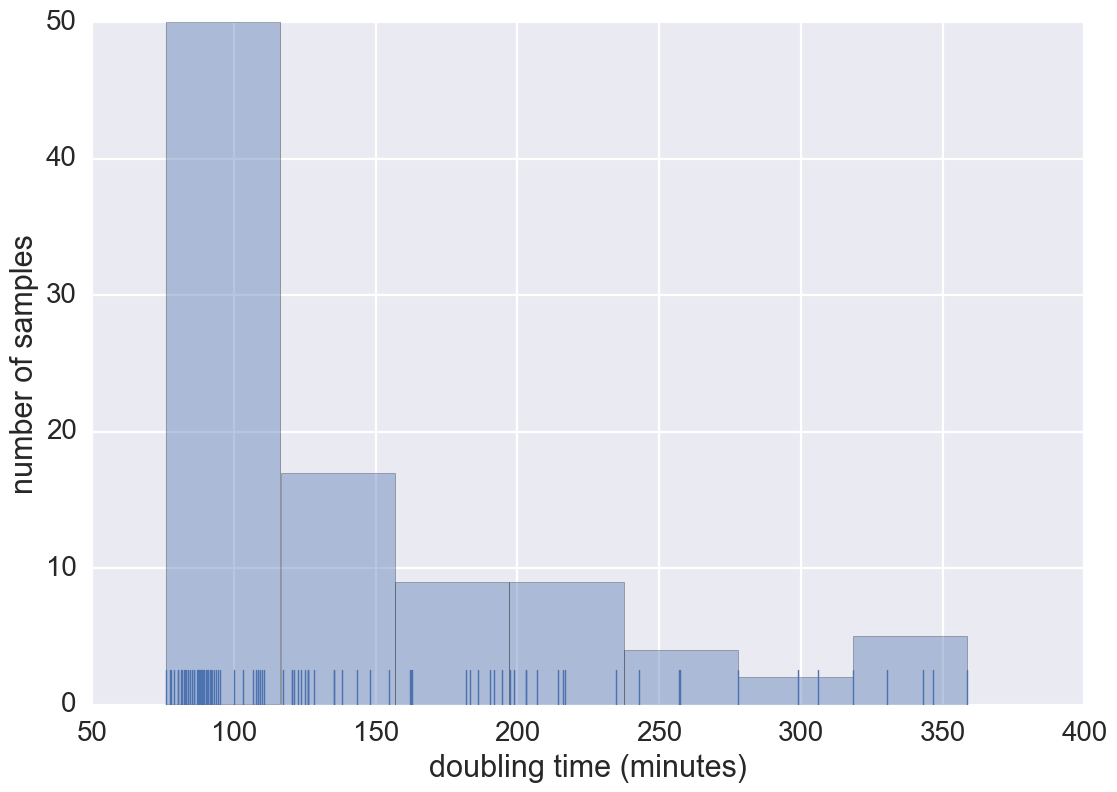

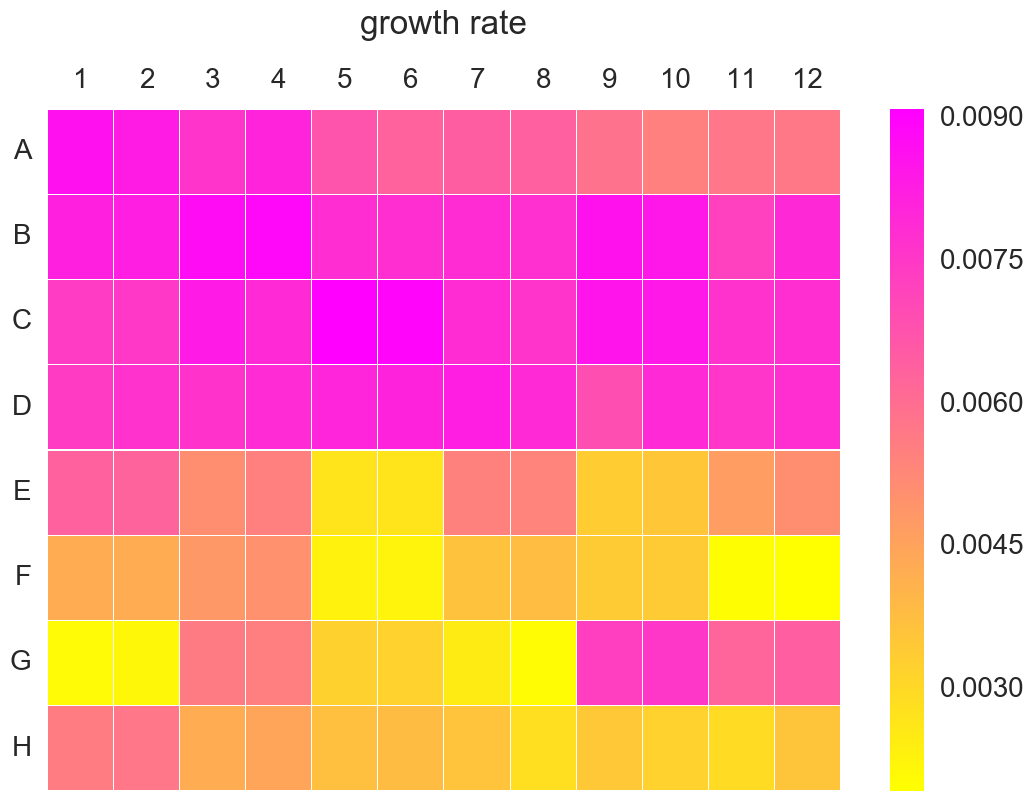

In [8]:
od.make_plots(demo_expt1)

This created a histogram showing the distribution of doubling times and a heatmap showing the growth rates (from which the doubling times are calculated).
We can actually plot any of the results metrics on these plots. For example, here is a histogram of the growth rates. 

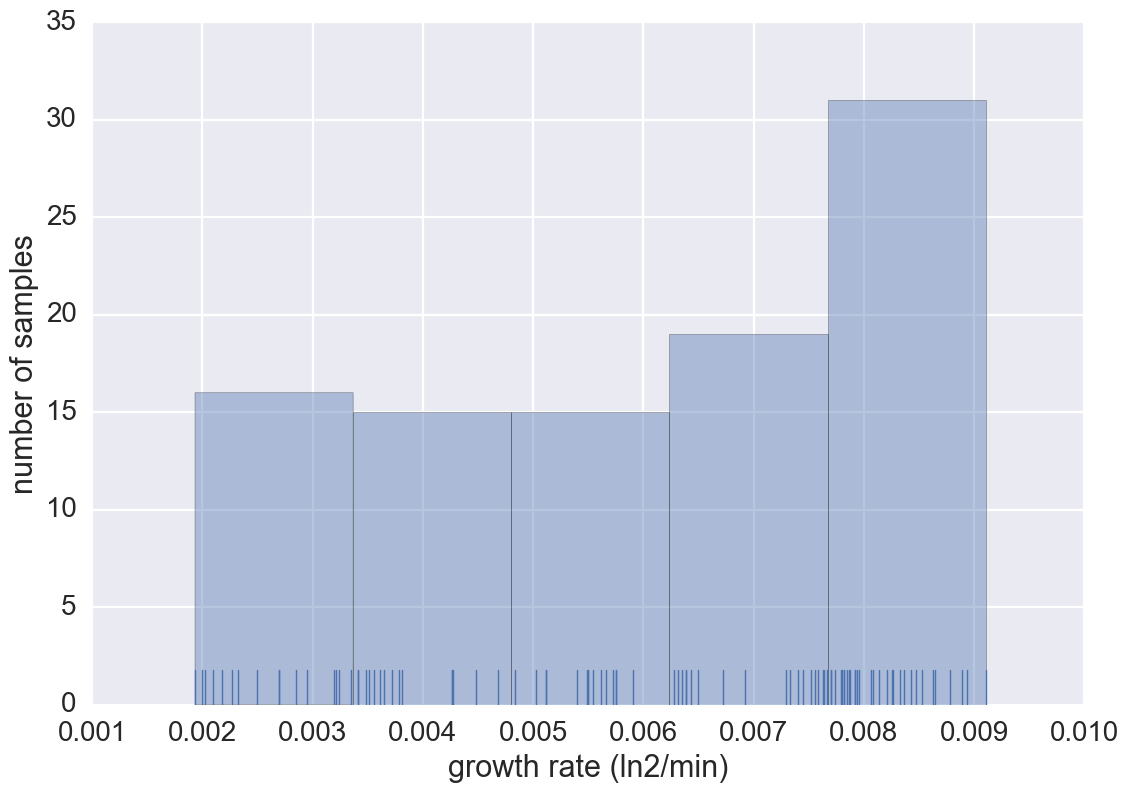

In [9]:
demo_expt1.plot_histogram(metric='growth rate', unit='ln2/min')

And here are heat maps of doubling time and saturation time.

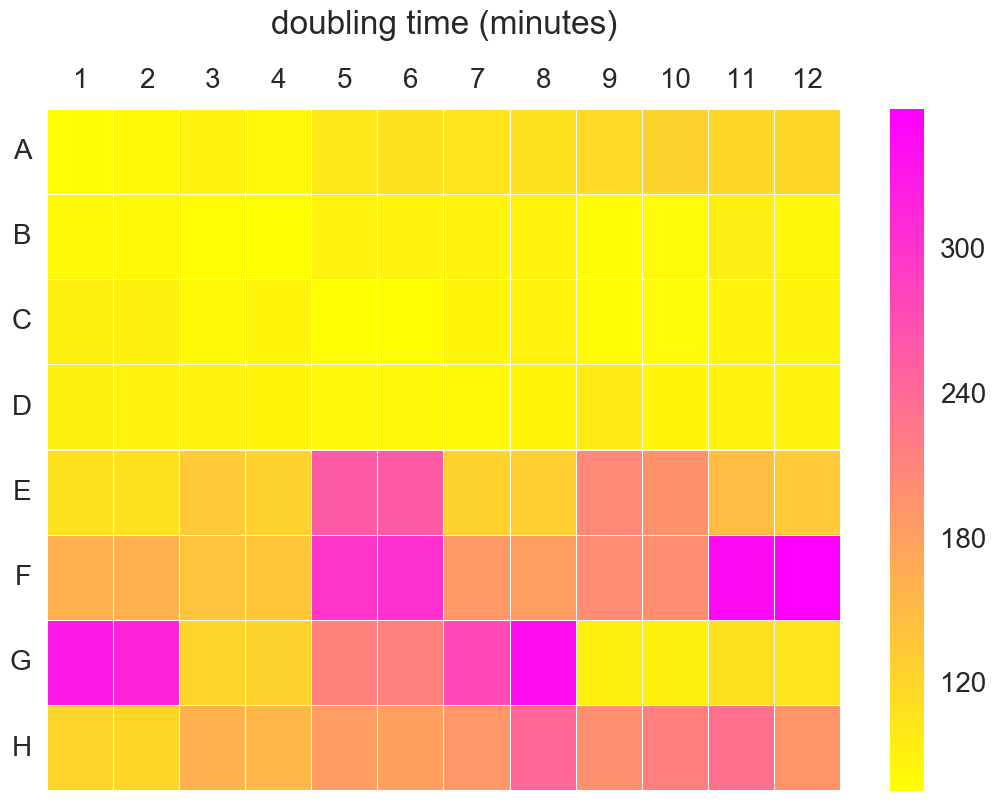

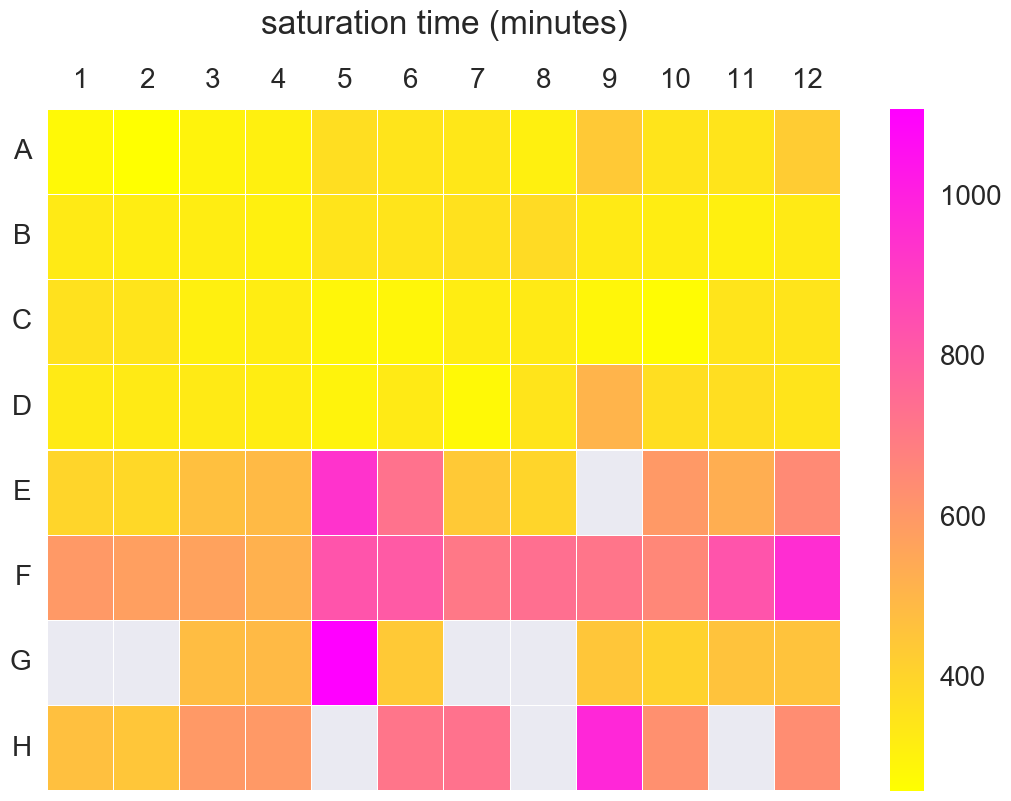

In [10]:
demo_expt1.plot_heatmap(metric='doubling time', unit='minutes')
demo_expt1.plot_heatmap(metric='saturation time', unit='minutes')

Gray squares are those samples with missing results. Some of the samples in this experiment had no detectable saturation point. 

Now let's see what a single sample's analysis looks like. We did not make sample plots in the first step (sample_plots=False is the default for analyze_experiment), but we can make one now. We can get a sample's information using the well name.

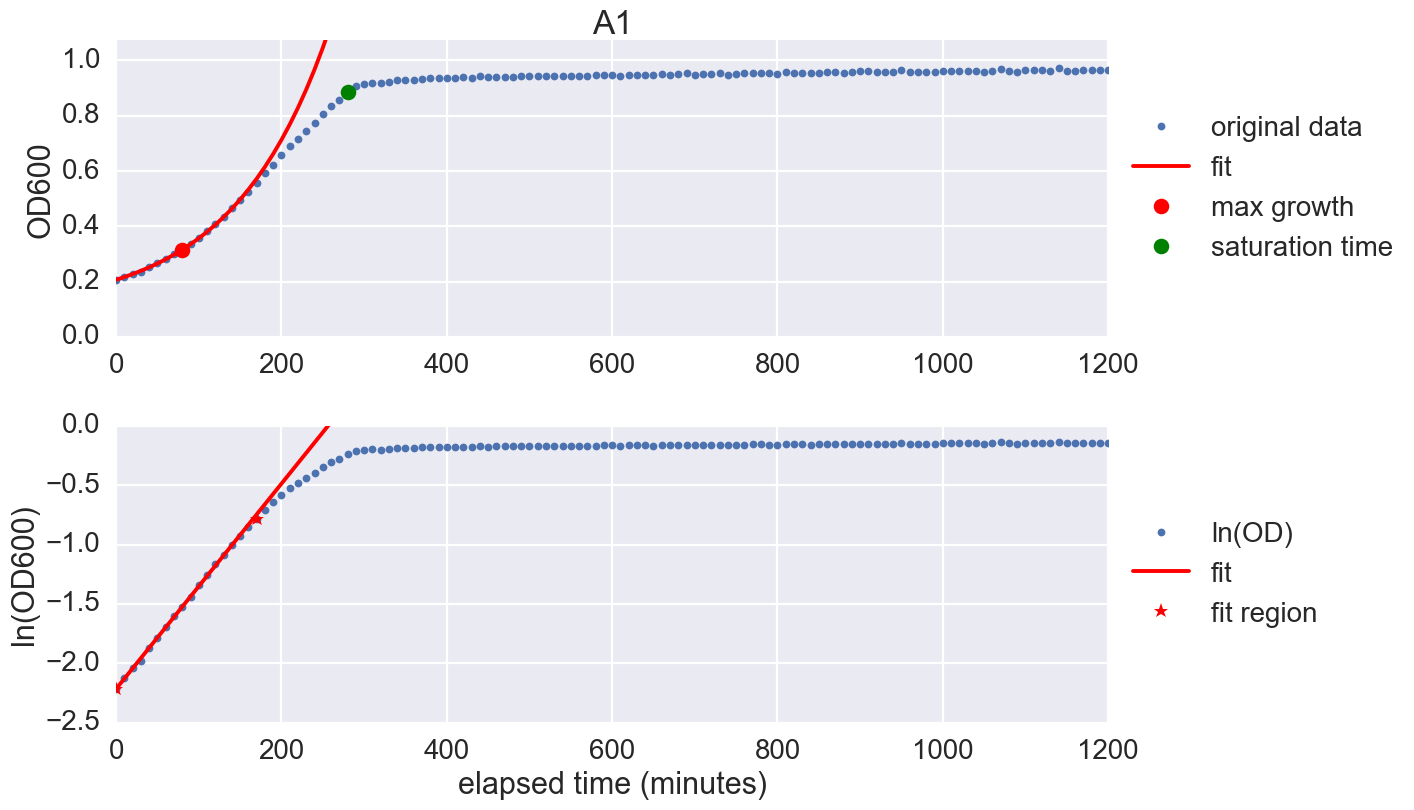

In [11]:
A1 = demo_expt1.samples['A1']
A1.plot_growth_parameters()

Here we have two plots. The upper plot is the original OD data, not adjusted by the blank value or nonlinear correction. The red line is the exponential curve that was fit to the ln(OD) data. This is seen as a straight line on the lower plot, which shows the log-transformed, calibrated data. The green point is the calculated time of saturation. Note that the "OD at saturation" in the results file is the value adjusted by the blank and nonlinear correction, while in this plot it is marked on the original data. The red point is the midpoint of the region of data used to calculate the growth rate. This region is marked by stars in the lower plot.

We can also plot the distribution of growth rates calculated in each window over the entire time course.

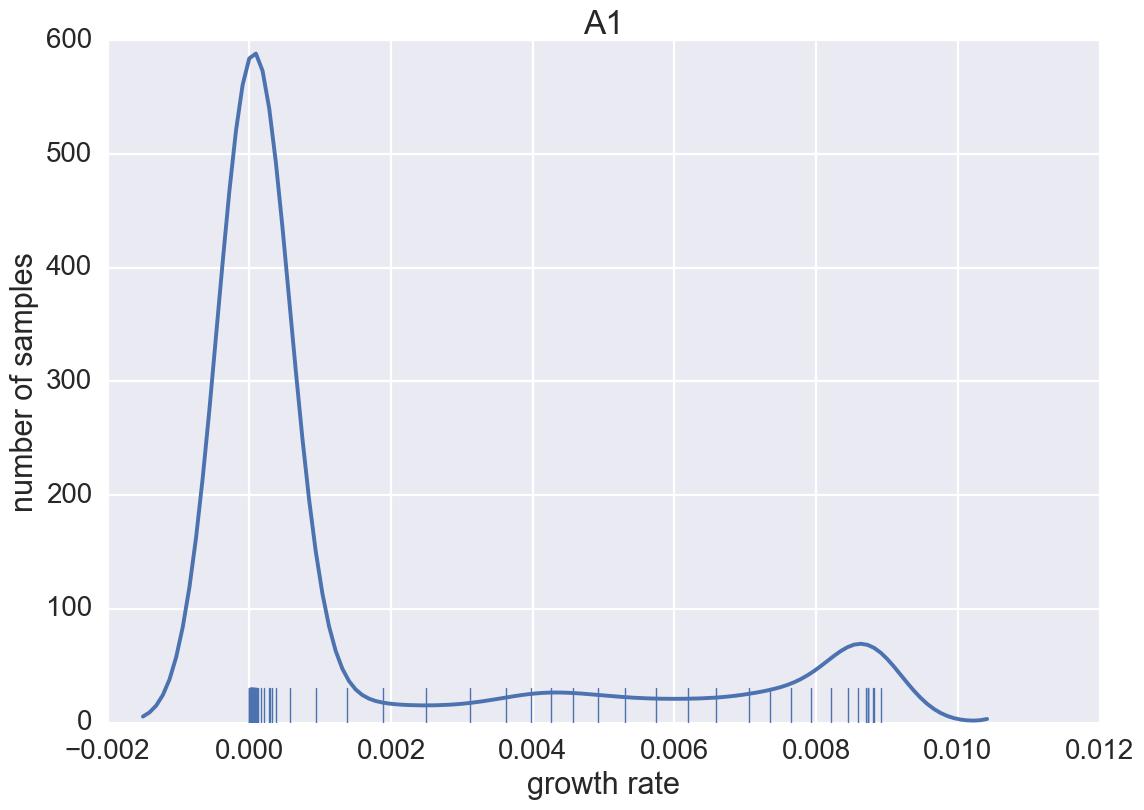

In [26]:
A1.plot_rates_distribution()

We can include a plate_layout file, containing any information we want added to the results. Here is a snippet of the demo_layout file.

In [27]:
demo_layout = '/Users/nwespe/Desktop/GROC/examples/20160727 ypd nacl layout.xlsx'
layout_df = pd.read_excel(demo_layout)
layout_df[:6]

,well,name,media,replicate,expt_date,run,strain,clone
0,A1,003,YPD,1,2016-07-27,YPD+/-NaCl,3,NaN
1,A2,003,YPD,2,2016-07-27,YPD+/-NaCl,3,NaN
2,A3,006A,YPD,1,2016-07-27,YPD+/-NaCl,6,A
3,A4,006A,YPD,2,2016-07-27,YPD+/-NaCl,6,A
4,A5,110-c4,YPD,1,2016-07-27,YPD+/-NaCl,110,-c4
5,A6,110-c4,YPD,2,2016-07-27,YPD+/-NaCl,110,-c4


To include this information with the experiment results, we need to run the analysis with the plate_layout file as an input.

In [16]:
demo_expt2 = od.analyze_experiment(demo_data, plate_layout=demo_layout, 
                                   blank_file=demo_blank_file, out_dir=output)

initialized experiment
analyzed samples
created output data table


Now this information is included as columns at the end of the results file.

In [17]:
demo_expt2.results[:6]

,well,growth rate,r-squared,doubling time,time of max growth rate,start of fit region,end of fit region,lag time,OD at end of lag,saturation time,...,time of max OD,row,column,name,media,replicate,expt_date,run,strain,clone
1,A1,0.008650,0.999460,80.132992,80.0,0,17,NaN,NaN,280.0,...,1140.0,1,1,003,YPD,1,2016-07-27,YPD+/-NaCl,3,NaN
2,A2,0.008330,0.999248,83.210904,80.0,0,16,NaN,NaN,260.0,...,1140.0,1,2,003,YPD,2,2016-07-27,YPD+/-NaCl,3,NaN
3,A3,0.007643,0.999504,90.688706,80.0,0,17,NaN,NaN,300.0,...,1140.0,1,3,006A,YPD,1,2016-07-27,YPD+/-NaCl,6,A
4,A4,0.008083,0.999553,85.753890,90.0,0,18,NaN,NaN,310.0,...,1140.0,1,4,006A,YPD,2,2016-07-27,YPD+/-NaCl,6,A
5,A5,0.006726,0.999336,103.055331,90.0,0,19,NaN,NaN,370.0,...,1020.0,1,5,110-c4,YPD,1,2016-07-27,YPD+/-NaCl,110,-c4
6,A6,0.006355,0.999591,109.069994,90.0,0,18,NaN,NaN,350.0,...,940.0,1,6,110-c4,YPD,2,2016-07-27,YPD+/-NaCl,110,-c4


In addition to calculating the maximum growth rate achieved during the full time course, we can also calculate a growth rate from a single fit to a defined period of time, termed the "effective growth rate." Here I'll calculate the growth rate from hours 2 to 6 of my time course.

In [18]:
demo_expt3 = od.analyze_experiment(demo_data, plate_layout=demo_layout, 
                                   blank_file=demo_blank_file, out_dir=output,
                                   method='effective_growth_rate', start=120, end=360)

initialized experiment
analyzed samples
created output data table


In [19]:
demo_expt3.results[:6]

,well,growth rate 120-360,r-squared 120-360,doubling time 120-360,saturation time,row,column,name,media,replicate,expt_date,run,strain,clone
1,A1,0.004319,0.918193,160.483851,None,1,1,003,YPD,1,2016-07-27,YPD+/-NaCl,003,NaN
2,A2,0.003667,0.889247,189.014709,None,1,2,003,YPD,2,2016-07-27,YPD+/-NaCl,003,NaN
3,A3,0.004436,0.949820,156.265132,None,1,3,006A,YPD,1,2016-07-27,YPD+/-NaCl,006,A
4,A4,0.005237,0.971282,132.361560,None,1,4,006A,YPD,2,2016-07-27,YPD+/-NaCl,006,A
5,A5,0.004673,0.993701,148.323758,None,1,5,110-c4,YPD,1,2016-07-27,YPD+/-NaCl,110,-c4
6,A6,0.004360,0.994464,158.972499,None,1,6,110-c4,YPD,2,2016-07-27,YPD+/-NaCl,110,-c4


Well A2 has a lower r-squared value than we'd like - let's look at the data for that well.

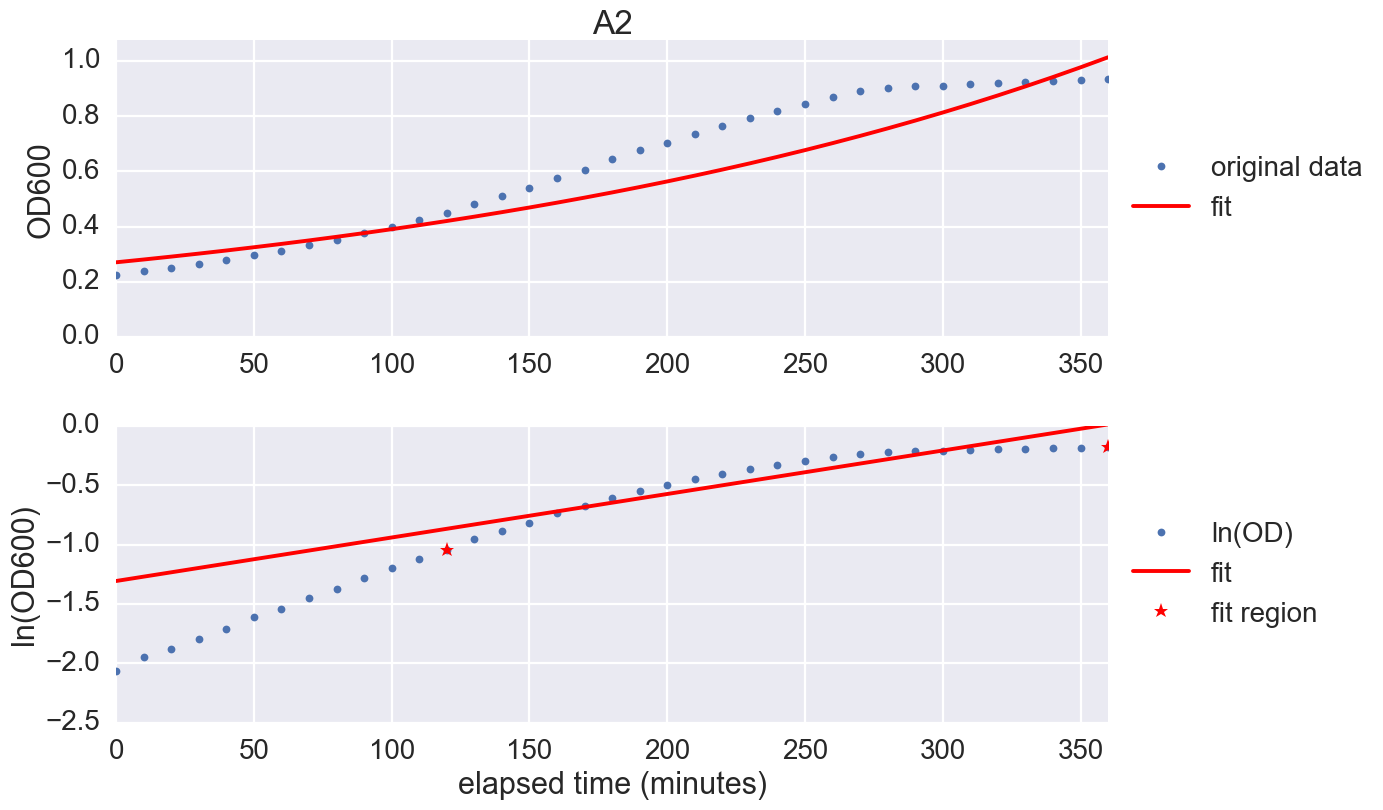

In [20]:
A2 = demo_expt3.samples['A2']
A2.plot_growth_parameters()

The problem is that the culture is changing from exponential growth to saturation during the time period specified. To accommodate saturation, we can use the option "saturation=True" to calculate the growth rate for the time from start to the end specified or the saturation time, whichever comes first. 

In [21]:
demo_expt4 = od.analyze_experiment(demo_data, plate_layout=demo_layout, blank_file=demo_blank_file, out_dir=output, 
                                  method='effective_growth_rate', start=120, end=360, saturation=True)

initialized experiment
analyzed samples
created output data table


In [22]:
demo_expt4.results[:6]

,well,growth rate 120-360,r-squared 120-360,doubling time 120-360,saturation time,row,column,name,media,replicate,expt_date,run,strain,clone
1,A1,0.005961,0.982807,116.289829,280.0,1,1,003,YPD,1,2016-07-27,YPD+/-NaCl,003,NaN
2,A2,0.005779,0.983855,119.945085,260.0,1,2,003,YPD,2,2016-07-27,YPD+/-NaCl,003,NaN
3,A3,0.005459,0.990479,126.966452,300.0,1,3,006A,YPD,1,2016-07-27,YPD+/-NaCl,006,A
4,A4,0.006001,0.990979,115.506254,310.0,1,4,006A,YPD,2,2016-07-27,YPD+/-NaCl,006,A
5,A5,0.004673,0.993701,148.323758,370.0,1,5,110-c4,YPD,1,2016-07-27,YPD+/-NaCl,110,-c4
6,A6,0.004387,0.994110,157.983228,350.0,1,6,110-c4,YPD,2,2016-07-27,YPD+/-NaCl,110,-c4


Additional methods for calculating the maximum growth rate are described in the documentation. Other options for all growth rate calculations include creating and saving sample plot files, specifying the window size used for fitting, excluding very low OD values, and applying a correction for nonlinearity of OD values.

One more function provided in this program is "compute_means." This calculates the mean and standard deviation for samples grouped by one or more features from the layout file. I included replicates of each strain and media condition in my experiment, so I will group my samples by "strain" and "media." I will run this function for demo_expt2, which calculated the max growth rate and included the layout information.

In [23]:
od.compute_means(demo_expt2, metric=['growth rate'], keys=['strain','media'])

growth rate          
                           mean       std
strain media                             
3      0.5 M NaCl      0.006348  0.000049
       YPD             0.008485  0.000137
       alpha factor    0.007443  0.000156
6      0.5 M NaCl      0.005832  0.000627
       YPD             0.007806  0.000195
12     0.5 M NaCl      0.003414  0.000002
       YPD             0.008550  0.000104
110    0.5 M NaCl      0.002694  0.000002
       YPD             0.006541  0.000262
112    0.5 M NaCl      0.003430  0.000115
       YPD             0.005704  0.000288
113    0.5 M NaCl      0.002137  0.000055
       YPD             0.007464  0.000086
128    0.5 M NaCl      0.005680  0.000095
       YPD             0.007575  0.000176
212    0.5 M NaCl      0.003712  0.000097
       YPD             0.007793  0.000079
217    0.5 M NaCl      0.004900  0.000308
       YPD             0.005739  0.000023
224    0.5 M NaCl      0.004929  0.000134
       YPD             0.008838  0.000076
227    0.5 M NaCl      0.003222  0.000019
       YPD             0.009023  0.000118
228    0.5 M NaCl      0.002258  0.000336
       YPD             0.007747  0.000163
229    0.5 M NaCl      0.005601  0.000081
       YPD             0.008152  0.000305
232    0.5 M NaCl      0.004372  0.000157
       YPD             0.007770  0.000147
234    0.5 M NaCl      0.003766  0.000062
       YPD             0.008103  0.000051
238    0.5 M NaCl      0.003232  0.000537
       YPD             0.008090  0.000240
240    0.5 M NaCl      0.003342  0.000204
       YPD             0.007419  0.000706
242    0.5 M NaCl      0.003256  0.000431
       YPD             0.007691  0.000157
247    0.5 M NaCl      0.002291  0.000039
       YPD             0.007820  0.000005
248    0.5 M NaCl      0.005444  0.000064
       YPD             0.006443  0.000074
249    0.5 M NaCl      0.004270  0.000004
       YPD             0.008235  0.000039
260    0.5 M NaCl      0.001966  0.000047
       YPD             0.007626  0.000469

We can actually do this for many different metrics at the same time. If we include "save=True," this saves the results to an excel file in the output directory specified earlier.

In [24]:
od.compute_means(demo_expt2, metric=['growth rate', 'doubling time', 'lag time', 
                                     'saturation time', 'max OD'], 
                 save=True, keys=['strain','media'])

growth rate           doubling time             \
                           mean       std          mean        std   
strain media                                                         
3      0.5 M NaCl      0.006348  0.000049    109.186839   0.843352   
       YPD             0.008485  0.000137     81.710323   1.321295   
       alpha factor    0.007443  0.000156     93.148259   1.949792   
6      0.5 M NaCl      0.005832  0.000627    119.910294  13.121773   
       YPD             0.007806  0.000195     88.837260   2.183185   
12     0.5 M NaCl      0.003414  0.000002    203.017731   0.094066   
       YPD             0.008550  0.000104     81.075832   0.987942   
110    0.5 M NaCl      0.002694  0.000002    257.321255   0.192237   
       YPD             0.006541  0.000262    106.062662   4.253009   
112    0.5 M NaCl      0.003430  0.000115    202.187395   6.778056   
       YPD             0.005704  0.000288    121.677764   6.154045   
113    0.5 M NaCl      0.002137  0.000055    324.491083   8.382872   
       YPD             0.007464  0.000086     92.866334   1.066945   
128    0.5 M NaCl      0.005680  0.000095    122.044097   2.046554   
       YPD             0.007575  0.000176     91.532436   2.125683   
212    0.5 M NaCl      0.003712  0.000097    186.771647   4.902833   
       YPD             0.007793  0.000079     88.948848   0.896181   
217    0.5 M NaCl      0.004900  0.000308    141.732184   8.897104   
       YPD             0.005739  0.000023    120.787903   0.492754   
224    0.5 M NaCl      0.004929  0.000134    140.684684   3.816101   
       YPD             0.008838  0.000076     78.429217   0.677190   
227    0.5 M NaCl      0.003222  0.000019    215.140184   1.266184   
       YPD             0.009023  0.000118     76.827915   1.003608   
228    0.5 M NaCl      0.002258  0.000336    310.363723  46.221976   
       YPD             0.007747  0.000163     89.493614   1.883988   
229    0.5 M NaCl      0.005601  0.000081    123.774174   1.795706   
       YPD             0.008152  0.000305     85.086389   3.184951   
232    0.5 M NaCl      0.004372  0.000157    158.661675   5.688286   
       YPD             0.007770  0.000147     89.225533   1.684732   
234    0.5 M NaCl      0.003766  0.000062    184.056652   3.041681   
       YPD             0.008103  0.000051     85.542439   0.537661   
238    0.5 M NaCl      0.003232  0.000537    217.443225  36.096717   
       YPD             0.008090  0.000240     85.721371   2.545995   
240    0.5 M NaCl      0.003342  0.000204    207.792578  12.694867   
       YPD             0.007419  0.000706     93.858390   8.933639   
242    0.5 M NaCl      0.003256  0.000431    214.775384  28.419635   
       YPD             0.007691  0.000157     90.144485   1.839101   
247    0.5 M NaCl      0.002291  0.000039    302.536061   5.116315   
       YPD             0.007820  0.000005     88.637533   0.058128   
248    0.5 M NaCl      0.005444  0.000064    127.331993   1.490325   
       YPD             0.006443  0.000074    107.589217   1.227375   
249    0.5 M NaCl      0.004270  0.000004    162.341553   0.145261   
       YPD             0.008235  0.000039     84.176494   0.399135   
260    0.5 M NaCl      0.001966  0.000047    352.734528   8.384235   
       YPD             0.007626  0.000469     91.068777   5.606326   

                       lag time           saturation time              \
                           mean       std            mean         std   
strain media                                                            
3      0.5 M NaCl     42.258022  6.496274           395.0    7.071068   
       YPD                  NaN       NaN           275.0   12.909944   
       alpha factor         NaN       NaN           430.0   28.284271   
6      0.5 M NaCl     53.709324  1.382959           470.0   14.142136   
       YPD                  NaN       NaN           327.5   26.299556   
12     0.5 M NaCl           NaN       NaN           690.0   42.426407   
  

To see examples of plotting these results and aggregated curves of the raw data, look at Plot-GROC_demo_notebook.ipynb.